In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#set url
url = 'https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900'

In [4]:
#creating request
r = requests.get(url)

In [5]:
#receiving request as text
html_doc = r.text

In [6]:
soup = BeautifulSoup(html_doc)

In [7]:
pretty_soup = soup.prettify()

In [8]:
pretty_soup[:1000]

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   List of deadly earthquakes since 1900 - Wikipedia\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"5dc713a6-7bb9-4207-93cf-592688fd62e9","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":982410602,"wgRevisionId":982410602,"wgArticleId":11673441,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Articles needing additional referenc

In [9]:
soup.find('table')
soup.find('table', attrs={'class' : 'wikitable'})

<table class="sortable wikitable">
<tbody><tr bgcolor="#CCCCCC">
<th width="22%">Origin (<a class="mw-redirect" href="/wiki/UTC" title="UTC">UTC</a>)</th>
<th width="33%">Present-day country and link to Wikipedia article</th>
<th width="10%"><a href="/wiki/Latitude" title="Latitude">Lat</a></th>
<th width="10%"><a href="/wiki/Longitude" title="Longitude">Long</a></th>
<th width="8%">Depth (<a class="mw-redirect" href="/wiki/Km" title="Km">km</a>)</th>
<th width="6%">Magnitude</th>
<th width="9%">Secondary Effects</th>
<th width="10%">PDE Shaking Deaths</th>
<th width="10%">PDE Total Deaths</th>
<th width="10%">Utsu Total Deaths</th>
<th width="10%">EM-DAT Total Deaths</th>
<th width="12%">Other Source Deaths
</th></tr>
<tr>
<td>1900-05-11 17:23</td>
<td>Japan</td>
<td>38.700</td>
<td>141.100</td>
<td>5</td>
<td>7.0 <a href="/wiki/Seismic_magnitude_scales#Mjma" title="Seismic magnitude scales"><span class="rt-commentedText" title="JMA mag.">M<sub>JMA</sub></span></a></td>
<td></td>
<td>

In [10]:
table_html = str(soup.find('table', attrs={'class' : 'wikitable'}))

In [11]:
from IPython.core.display import HTML

HTML(table_html)

Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,,,,,,
1900-07-12 06:25,Turkey,40.300,43.100,,5.9 Muk,,,,140,,
1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,,,,,,
1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,,,,,,
1901-03-31 07:11,Bulgaria,43.400,28.700,,6.4 Muk,,,,4,,
1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,,,,,
1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,,,,1,,
1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,,,,1,,
1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,,,,86,,
1902-03-09 07:46,Turkey,40.700,33.600,,5.5 Muk,,,,4,,


In [12]:
table = pd.read_html(table_html)
table

[          Origin (UTC) Present-day country and link to Wikipedia article  \
 0     1900-05-11 17:23                                             Japan   
 1     1900-07-12 06:25                                            Turkey   
 2     1900-10-29 09:11                                         Venezuela   
 3     1901-02-15 00:00                                             China   
 4     1901-03-31 07:11                                          Bulgaria   
 ...                ...                                               ...   
 1335  2011-03-24 20:25                 Burma (see 2011 Burma earthquake)   
 1336  2011-04-07 14:32          Japan (see April 2011 Miyagi earthquake)   
 1337  2011-09-18 12:40                India (see 2011 Sikkim earthquake)   
 1338  2011-09-23 10:41                  Turkey (see 2011 Van earthquake)   
 1339  2018-08-05 19:46                 Indonesia (see Lombok earthquake)   
 
          Lat     Long Depth (km) Magnitude Secondary Effects  \
 0     38

In [13]:
#the table is a list and we need access the elements within it
type(table)

list

In [14]:
# there is only one element in this list
len(table)

1

In [15]:
wikipedia_df = table[0]

In [16]:
wikipedia_df.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,NaN


In [17]:
columns = ['origin_utc', 'country',
       'lat', 'long', 'depth_km', 'magnitude', 'secondary_effects',
       'pde_shaking_deaths', 'pde_total_deaths', 'utsu_total_deaths',
       'em_dat_total_deaths', 'other_source_deaths']

In [18]:
wikipedia_df.columns = columns

In [19]:
wikipedia_df.head()

,origin_utc,country,lat,long,depth_km,magnitude,secondary_effects,pde_shaking_deaths,pde_total_deaths,utsu_total_deaths,em_dat_total_deaths,other_source_deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,NaN


In [20]:
wikipedia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin_utc           1340 non-null   object 
 1   country              1340 non-null   object 
 2   lat                  1325 non-null   object 
 3   long                 1325 non-null   object 
 4   depth_km             1250 non-null   object 
 5   magnitude            1339 non-null   object 
 6   secondary_effects    373 non-null    object 
 7   pde_shaking_deaths   738 non-null    float64
 8   pde_total_deaths     749 non-null    float64
 9   utsu_total_deaths    1027 non-null   float64
 10  em_dat_total_deaths  559 non-null    object 
 11  other_source_deaths  37 non-null     object 
dtypes: float64(3), object(9)
memory usage: 125.8+ KB


In [21]:
#change origin column to datetime
wikipedia_df['origin_utc'] = pd.to_datetime(wikipedia_df['origin_utc'])

In [22]:
#lat and long are not something we need in the dataset, so we'll leave them as strings unless needed later

In [23]:
#the ? is causing errors when trying to convert data types
wikipedia_df[wikipedia_df['depth_km'] == '?']

,origin_utc,country,lat,long,depth_km,magnitude,secondary_effects,pde_shaking_deaths,pde_total_deaths,utsu_total_deaths,em_dat_total_deaths,other_source_deaths
413,1963-06-26 04:17:00,Macedonia (see 1963 Skopje earthquake),?,??,?,6.1 Mw,NaN,NaN,1100.0,NaN,NaN,NaN


In [24]:
wikipedia_df.iloc[413] = wikipedia_df.iloc[413].replace('?','NaN')

In [25]:

wikipedia_df.iloc[413] = wikipedia_df.iloc[413].replace('??', 'NaN')

In [26]:

wikipedia_df['lat'] = wikipedia_df['lat'].astype('float')

In [27]:
wikipedia_df['long'] = wikipedia_df['long'].astype('float')

In [28]:
wikipedia_df['depth_km'] = wikipedia_df['depth_km'].astype('float')

In [29]:
#converted to a string with as type and then said we want the first 3 elements of the string
wikipedia_df['magnitude'] = wikipedia_df['magnitude'].astype(str).str[0:3]

In [30]:
#finding where 5 M comes from so we can fix individually
wikipedia_df[wikipedia_df['magnitude'] == '5 M']

,origin_utc,country,lat,long,depth_km,magnitude,secondary_effects,pde_shaking_deaths,pde_total_deaths,utsu_total_deaths,em_dat_total_deaths,other_source_deaths
439,1966-04-25 23:22:00,Uzbekistan (see 1966 Tashkent earthquake),NaN,NaN,NaN,5 M,NaN,NaN,NaN,NaN,10[7]|,NaN


In [31]:
wikipedia_df.iloc[439]


origin_utc                                   1966-04-25 23:22:00
country                Uzbekistan (see 1966 Tashkent earthquake)
lat                                                          NaN
long                                                         NaN
depth_km                                                     NaN
magnitude                                                    5 M
secondary_effects                                            NaN
pde_shaking_deaths                                           NaN
pde_total_deaths                                             NaN
utsu_total_deaths                                            NaN
em_dat_total_deaths                                       10[7]|
other_source_deaths                                          NaN
Name: 439, dtype: object

In [32]:
wikipedia_df.iloc[439] = wikipedia_df.iloc[439].replace('5 M', '5.0')

In [33]:
#converting to floats should work now that 439 is fixed
wikipedia_df['magnitude'] = wikipedia_df['magnitude'].astype('float')

In [34]:
wikipedia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   origin_utc           1340 non-null   datetime64[ns]
 1   country              1340 non-null   object        
 2   lat                  1324 non-null   float64       
 3   long                 1324 non-null   float64       
 4   depth_km             1249 non-null   float64       
 5   magnitude            1339 non-null   float64       
 6   secondary_effects    373 non-null    object        
 7   pde_shaking_deaths   738 non-null    float64       
 8   pde_total_deaths     749 non-null    float64       
 9   utsu_total_deaths    1027 non-null   float64       
 10  em_dat_total_deaths  559 non-null    object        
 11  other_source_deaths  37 non-null     object        
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 125.8+ KB


In [35]:
# try this on Tuesday 
wikipedia_df['country'] = wikipedia_df['country'].str.replace(r"\(.*?\)","")

# Savannah's work from here on:

### fixing death columns

In [36]:
#fixing formattnig issue for 'em_dat_total_deaths' column
#everything up to ' ' or '[' or '+'
wikipedia_df['em_dat_total_deaths'] = wikipedia_df['em_dat_total_deaths'].str.replace(r"\[.*?\]","")
wikipedia_df['em_dat_total_deaths'] = wikipedia_df['em_dat_total_deaths'].str.replace('[^0-9]+',"")

#stripping away extra space at end if necessary
wikipedia_df['em_dat_total_deaths'] = wikipedia_df['em_dat_total_deaths'].str.strip() 

In [37]:
#fixing formattnig issue for 'other_source_deaths' column
#everything up to ' ' or '[' or '+'
wikipedia_df['other_source_deaths'] = wikipedia_df['other_source_deaths'].str.replace(r"\[.*?\]","")
wikipedia_df['other_source_deaths'] = wikipedia_df['other_source_deaths'].str.replace('[^0-9]+',"")

#stripping away extra space at end if necessary
wikipedia_df['other_source_deaths'] = wikipedia_df['other_source_deaths'].str.strip() 

In [38]:
#converting columns to float
wikipedia_df['em_dat_total_deaths'] = wikipedia_df['em_dat_total_deaths'].astype(float)
wikipedia_df['other_source_deaths'] = wikipedia_df['other_source_deaths'].astype(float)

In [39]:
#making deaths column from highest death value
wikipedia_df['deaths'] = wikipedia_df[['pde_total_deaths','utsu_total_deaths','em_dat_total_deaths','other_source_deaths']].apply(max, axis=1)

In [40]:
wikipedia_df = wikipedia_df.drop(['pde_total_deaths','utsu_total_deaths','em_dat_total_deaths','other_source_deaths'], axis=1)

In [50]:
temp = wikipedia_df[(wikipedia_df['deaths']>1) & (wikipedia_df['magnitude']>4) &(wikipedia_df['magnitude']<5)]

In [52]:
temp['deaths'].shape


(26,)

### Analysis

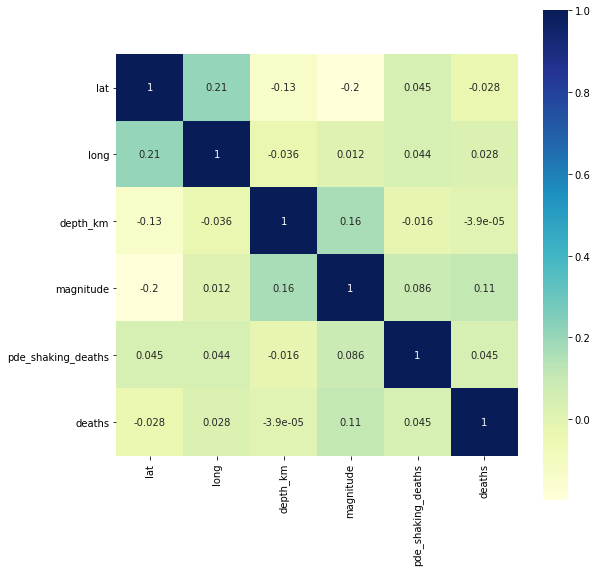

In [55]:
#correlation heatmap
fig, ax = plt.subplots(figsize=(9,9)) 
sns.heatmap(wikipedia_df.corr(), annot = True, square=True, cmap= 'YlGnBu')

Text(0, 0.5, 'Number of Earthquakes')

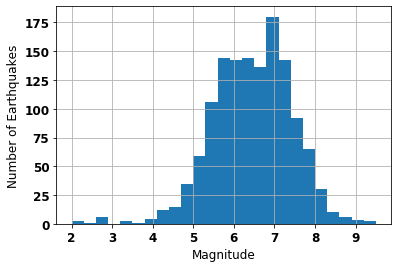

In [166]:
wikipedia_df['magnitude'].hist(bins = 25)
plt.xlabel('Magnitude')
plt.ylabel('Number of Earthquakes')

In [167]:
#getting rid of extra whitespace after some countries
wikipedia_df['country'] = wikipedia_df['country'].str.strip() 

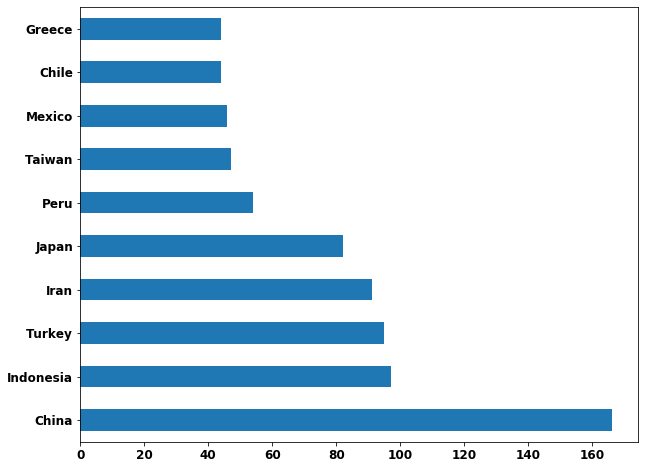

In [168]:
wikipedia_df['country'].value_counts().head(10).plot(kind = 'barh', figsize = (10,8))